In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import copy

csv_data = pd.read_csv('Cleaned_Historical_Data.csv')



In [2]:
print(csv_data.head())
column_names = list(csv_data.columns)

         Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  10/01/2017    Arsenal    Brighton     2     0   H     1     0   H   
1  10/01/2017    Everton     Burnley     0     1   A     0     1   A   
2  10/01/2017  Newcastle   Liverpool     1     1   D     1     1   D   
3  12/02/2017    Arsenal  Man United     1     3   A     0     2   A   
4  12/02/2017    Watford   Tottenham     1     1   D     1     1   D   

      Referee  ...  AIn  AOut  AStr  AOff  Ablock  APSxG  APSxG+/-  AWon  \
0    K Friend  ...    5     0     0     3       8    2.7       0.7    13   
1      J Moss  ...    3     0     0     1      10    0.3       0.3    34   
2    C Pawson  ...    2     3     0     2      10    1.3       0.3    20   
3  A Marriner  ...    1     0     0     0       7    5.0       4.0    24   
4  M Atkinson  ...    1     0     1    10       6    0.2      -0.8    15   

   Alosts  AWon%  
0      30   30.2  
1      32   51.5  
2      16   55.6  
3      11   68.6  
4      19   44.

In [3]:
print(csv_data.info())
print(csv_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Columns: 272 entries, Date to AWon%
dtypes: float64(42), int64(224), object(6)
memory usage: 5.5+ MB
None
              FTHG         FTAG         HTHG         HTAG           HS  \
count  2636.000000  2636.000000  2636.000000  2636.000000  2636.000000   
mean      1.559560     1.273520     0.690061     0.571700    13.841806   
std       1.339468     1.221843     0.852228     0.780563     5.751826   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     0.000000     0.000000    13.000000   
75%       2.000000     2.000000     1.000000     1.000000    17.000000   
max       9.000000     9.000000     5.000000     5.000000    36.000000   

                AS          HST          AST           HF           AF  ...  \
count  2636.000000  2636.000000  2636.000000  2636.000000  2636.000000  ..

In [3]:
csv_data['Date'] = pd.to_datetime(csv_data['Date'], format='%d/%m/%Y')

csv_data.drop('Date', axis=1, inplace=True)
csv_data = pd.get_dummies(csv_data, columns=['HomeTeam', 'AwayTeam', 'Referee'])

In [4]:
ftr_mapping = {'H': 1, 'A': -1, 'D': 0}
csv_data['FTR'] = csv_data['FTR'].replace(ftr_mapping)
csv_data['HTR'] = csv_data['HTR'].replace(ftr_mapping)

# Adding detailed outcome columns based on the transformed 'FTR'
csv_data['Win'] = (csv_data['FTR'] == 1).astype(int)
csv_data['Lose'] = (csv_data['FTR'] == -1).astype(int)
csv_data['Draw'] = (csv_data['FTR'] == 0).astype(int)

csv_data['Win'] = (csv_data['HTR'] == 1).astype(int)
csv_data['Lose'] = (csv_data['HTR'] == -1).astype(int)
csv_data['Draw'] = (csv_data['HTR'] == 0).astype(int)

/tmp/ipykernel_111500/3857769114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  csv_data['FTR'] = csv_data['FTR'].replace(ftr_mapping)
/tmp/ipykernel_111500/3857769114.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  csv_data['HTR'] = csv_data['HTR'].replace(ftr_mapping)


In [5]:
X = csv_data.drop(['FTR', 'Win', 'Lose', 'Draw'], axis=1)
y = csv_data['FTR']

In [6]:
from sklearn.model_selection import train_test_split

X_train_random, X_validation_random, y_train_random, y_validation_random = train_test_split(X, y, test_size=0.25, random_state=42)
X_validation_random, X_test_random, y_validation_random, y_test_random = train_test_split(X_validation_random, y_validation_random, test_size=0.5, random_state=42)
print(X_train_random.shape, X_validation_random.shape, X_test_random.shape)
print(y_train_random.shape, y_validation_random.shape, y_test_random.shape)

(1977, 369) (329, 369) (330, 369)
(1977,) (329,) (330,)


In [7]:
X_train = X.iloc[0:1889]
print(X_train.shape)
Y_train = y.iloc[0:1889]
print(Y_train.shape)
X_validation = X.iloc[1890:2286]
print(X_validation.shape)
Y_validation = y.iloc[1890:2286]
print(Y_validation.shape)
X_test = X.iloc[2287:]
print(X_test.shape)
Y_test = y.iloc[2287:]
print(Y_test.shape)


(1889, 369)
(1889,)
(396, 369)
(396,)
(349, 369)
(349,)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))


model = RandomForestClassifier(random_state=42)
model.fit(X_train_random, y_train_random)
predictions = model.predict(X_test_random)

print("Accuracy:", accuracy_score(y_test_random, predictions))

Accuracy: 0.7650429799426934
Accuracy: 0.9121212121212121


In [9]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_validation_std = scaler.transform(X_validation)
X_test_std = scaler.transform(X_test)
print(X_train_std.shape, X_validation_std.shape, X_test_std.shape)

scaler.fit(X_train_random)
X_train_std_rand = scaler.transform(X_train_random)
X_validation_std_rand = scaler.transform(X_validation_random)
X_test_std_rand = scaler.transform(X_test_random)
print(X_train_std_rand.shape, X_validation_std_rand.shape, X_test_std_rand.shape)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_std, Y_train)
predictions = model.predict(X_test_std)

print("Accuracy:", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(X_train_std_rand, y_train_random)
predictions = model.predict(X_test_std_rand)

print("Accuracy:", accuracy_score(y_test_random, predictions))



(1889, 369) (396, 369) (349, 369)
(1977, 369) (329, 369) (330, 369)
Accuracy: 0.7679083094555874
Accuracy: 0.9090909090909091


In [10]:
# PCA 
from sklearn import decomposition
pca = decomposition.PCA(svd_solver='auto', random_state=42)
pca.fit(X_train)
transformed_train = pca.transform(X_train)
transformed_valid = pca.transform(X_validation)
transformed_test = pca.transform(X_test)
print(transformed_train.shape, transformed_valid.shape, transformed_test.shape)

pca = decomposition.PCA(svd_solver='auto', random_state=42)
pca.fit(X_train_std)
transformed_train_std = pca.transform(X_train_std)
transformed_valid_std = pca.transform(X_validation_std)
transformed_test_std = pca.transform(X_test_std)
print(transformed_train_std.shape, transformed_valid_std.shape, transformed_test_std.shape)


pca = decomposition.PCA(svd_solver='auto', random_state=42)
pca.fit(X_train_random)
transformed_train_random = pca.transform(X_train_random)
transformed_valid_random = pca.transform(X_validation_random)
transformed_test_random = pca.transform(X_test_random)
print(transformed_train_random.shape, transformed_valid_random.shape, transformed_test_random.shape)

pca = decomposition.PCA(svd_solver='auto', random_state=42)
pca.fit(X_train_std_rand)
transformed_train_std_random = pca.transform(X_train_std_rand)
transformed_valid_std_random = pca.transform(X_validation_std_rand)
transformed_test_std_random = pca.transform(X_test_std_rand)
print(transformed_train_std_random.shape, transformed_valid_std_random.shape, transformed_test_std_random.shape)

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_std, Y_train)
predictions = model.predict(transformed_test_std)

print("Accuracy (standardise):", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train, Y_train)
predictions = model.predict(transformed_test)

print("Accuracy:", accuracy_score(Y_test, predictions))


model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_std_random, y_train_random)
predictions = model.predict(transformed_test_std_random)

print("Accuracy (standardise):", accuracy_score(y_test_random, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_random, y_train_random)
predictions = model.predict(transformed_test_random)

print("Accuracy:", accuracy_score(y_test_random, predictions))



(1889, 369) (396, 369) (349, 369)
(1889, 369) (396, 369) (349, 369)
(1977, 369) (329, 369) (330, 369)
(1977, 369) (329, 369) (330, 369)
Accuracy (standardise): 0.6017191977077364
Accuracy: 0.5214899713467048
Accuracy (standardise): 0.6757575757575758
Accuracy: 0.5787878787878787


In [11]:
from sklearn import discriminant_analysis
LinearDiscriminantAnalysis = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train, Y_train)
transformed_lda_train = LinearDiscriminantAnalysis.transform(X_train)
transformed_lda_valid = LinearDiscriminantAnalysis.transform(X_validation)
transformed_lda_test = LinearDiscriminantAnalysis.transform(X_test)
print(transformed_lda_train.shape, transformed_lda_valid.shape, transformed_lda_test.shape)

LinearDiscriminantAnalysis = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_std, Y_train)
transformed_lda_train_std = LinearDiscriminantAnalysis.transform(X_train_std)
transformed_lda_valid_std = LinearDiscriminantAnalysis.transform(X_validation_std)
transformed_lda_test_std = LinearDiscriminantAnalysis.transform(X_test_std)
print(transformed_lda_train_std.shape, transformed_lda_valid_std.shape, transformed_lda_test_std.shape)

LinearDiscriminantAnalysis = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_random, y_train_random)
transformed_lda_train_random = LinearDiscriminantAnalysis.transform(X_train_random)
transformed_lda_valid_random = LinearDiscriminantAnalysis.transform(X_validation_random)
transformed_lda_test_random = LinearDiscriminantAnalysis.transform(X_test_random)
print(transformed_lda_train_random.shape, transformed_lda_valid_random.shape, transformed_lda_test_random.shape)

LinearDiscriminantAnalysis = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_std_rand, y_train_random)
transformed_lda_train_std_random = LinearDiscriminantAnalysis.transform(X_train_std_rand)
transformed_lda_valid_std_random = LinearDiscriminantAnalysis.transform(X_validation_std_rand)
transformed_lda_test_std_random = LinearDiscriminantAnalysis.transform(X_test_std_rand)
print(transformed_lda_train_std_random.shape, transformed_lda_valid_std_random.shape, transformed_lda_test_std_random.shape)


model = RandomForestClassifier(random_state=42)
model.fit(transformed_lda_train, Y_train)
predictions = model.predict(transformed_lda_test)

print("Accuracy:", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_lda_train_std, Y_train)
predictions = model.predict(transformed_lda_test_std)

print("Accuracy (standardise):", accuracy_score(Y_test, predictions))


model = RandomForestClassifier(random_state=42)
model.fit(transformed_lda_train_random, y_train_random)
predictions = model.predict(transformed_lda_test_random)

print("Accuracy:", accuracy_score(y_test_random, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_lda_train_std_random, y_train_random)
predictions = model.predict(transformed_lda_test_std_random)

print("Accuracy (standardise):", accuracy_score(y_test_random, predictions))

(1889, 2) (396, 2) (349, 2)
(1889, 2) (396, 2) (349, 2)
(1977, 2) (329, 2) (330, 2)
(1977, 2) (329, 2) (330, 2)
Accuracy: 0.6475644699140402
Accuracy (standardise): 0.6475644699140402
Accuracy: 0.8575757575757575
Accuracy (standardise): 0.8575757575757575


In [12]:
from sklearn.cluster import KMeans
num_itts = 10

costs = [];
approx_bic = []
for i in range(100):
    c = 0
    a_b = 0
    for r in range(num_itts):
        kmeans = KMeans(n_clusters=i+1, random_state=r).fit(X_train)

        c += kmeans.inertia_

        k = np.shape(kmeans.cluster_centers_)[0]*(np.shape(kmeans.cluster_centers_)[1] + 1)
        m = len(X_train)        
        a_b += m*np.log(kmeans.inertia_ / m) + k*np.log(m)

    costs.append(c / num_itts)
    approx_bic.append(a_b / num_itts)

fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(costs)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Reconstruction Cost');  

ax = fig.add_subplot(1, 2, 2)
ax.plot(approx_bic)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Approximate BIC');  

KeyboardInterrupt: 

In [69]:
bic_score = np.argmin(approx_bic) + 1
print(bic_score)

1


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=4).fit(X_train)
X_train_cluster = kmeans.predict(X_train)
X_validation_cluster = kmeans.predict(X_validation)
X_test_cluster = kmeans.predict(X_test)

kmeans = KMeans(n_clusters=1, random_state=4).fit(X_train_std)
X_train_std_cluster = kmeans.predict(X_train_std)
X_validation_std_cluster = kmeans.predict(X_validation_std)
X_test_std_cluster = kmeans.predict(X_test_std)

kmeans = KMeans(n_clusters=1, random_state=4).fit(X_train_random)
X_train_random_cluster = kmeans.predict(X_train_random)
X_validation_random_cluster = kmeans.predict(X_validation_random)
X_test_random_cluster = kmeans.predict(X_test_random)

kmeans = KMeans(n_clusters=1, random_state=4).fit(X_train_std_rand)
X_train_std_random_cluster = kmeans.predict(X_train_std_rand)
X_validation_std_random_cluster = kmeans.predict(X_validation_std_rand)
X_test_std_random_cluster = kmeans.predict(X_test_std_rand)


model = RandomForestClassifier(random_state=42)
model.fit(X_train_cluster.reshape(-1, 1), Y_train)
predictions = model.predict(X_test_cluster.reshape(-1, 1))

print("Accuracy:", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(X_train_std_cluster.reshape(-1, 1), Y_train)
predictions = model.predict(X_test_std_cluster.reshape(-1, 1))

print("Accuracy (standardise):", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(X_train_random_cluster.reshape(-1, 1), y_train_random)
predictions = model.predict(X_test_random_cluster.reshape(-1, 1))

print("Accuracy:", accuracy_score(y_test_random, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(X_train_std_random_cluster.reshape(-1, 1), y_train_random)
predictions = model.predict(X_test_std_random_cluster.reshape(-1, 1))

print("Accuracy (standardise):", accuracy_score(y_test_random, predictions))

Accuracy: 0.45558739255014324
Accuracy (standardise): 0.45558739255014324
Accuracy: 0.44242424242424244
Accuracy (standardise): 0.44242424242424244


In [14]:
from sklearn.mixture import GaussianMixture
num_itts = 5
bics = []
for i in range (100):
    b = 0
    for r in range(num_itts):
        gmm = GaussianMixture(i+1, random_state=r)
        gmm.fit(X_train)
        b += gmm.bic(X_train)
    bics.append(b / num_itts)
    
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(bics)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('BIC');

KeyboardInterrupt: 

In [75]:
gmm_score = np.argmin(bics) + 1
print(gmm_score)

1


In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(1, random_state=42)
gmm.fit(X_train)
transformed_train_gmm = gmm.predict_proba(X_train)
transformed_valid_gmm = gmm.predict_proba(X_validation)
transformed_test_gmm = gmm.predict_proba(X_test)
print(transformed_train_gmm.shape, transformed_valid_gmm.shape, transformed_test_gmm.shape)

gmm.fit(X_train_std)
transformed_train_std_gmm = gmm.predict_proba(X_train_std)
transformed_valid_std_gmm = gmm.predict_proba(X_validation_std)
transformed_test_std_gmm = gmm.predict_proba(X_test_std)
print(transformed_train_std_gmm.shape, transformed_valid_std_gmm.shape, transformed_test_std_gmm.shape)

gmm.fit(X_train_random)
transformed_train_random_gmm = gmm.predict_proba(X_train_random)
transformed_valid_random_gmm = gmm.predict_proba(X_validation_random)
transformed_test_random_gmm = gmm.predict_proba(X_test_random)
print(transformed_train_random_gmm.shape, transformed_valid_random_gmm.shape, transformed_test_random_gmm.shape)

gmm.fit(X_train_std_rand)
transformed_train_std_random_gmm = gmm.predict_proba(X_train_std_rand)
transformed_valid_std_random_gmm = gmm.predict_proba(X_validation_std_rand)
transformed_test_std_random_gmm = gmm.predict_proba(X_test_std_rand)
print(transformed_train_std_random_gmm.shape, transformed_valid_std_random_gmm.shape, transformed_test_std_random_gmm.shape)

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_gmm, Y_train)
predictions = model.predict(transformed_test_gmm)

print("Accuracy:", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_std_gmm, Y_train)
predictions = model.predict(transformed_test_std_gmm)

print("Accuracy (standardise):", accuracy_score(Y_test, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_random_gmm, y_train_random)
predictions = model.predict(transformed_test_random_gmm)

print("Accuracy:", accuracy_score(y_test_random, predictions))

model = RandomForestClassifier(random_state=42)
model.fit(transformed_train_std_random_gmm, y_train_random)
predictions = model.predict(transformed_test_std_random_gmm)

print("Accuracy (standardise):", accuracy_score(y_test_random, predictions))

(1889, 1) (396, 1) (349, 1)
(1889, 1) (396, 1) (349, 1)
(1977, 1) (329, 1) (330, 1)
(1977, 1) (329, 1) (330, 1)
Accuracy: 0.45558739255014324
Accuracy (standardise): 0.45558739255014324
Accuracy: 0.44242424242424244
Accuracy (standardise): 0.44242424242424244


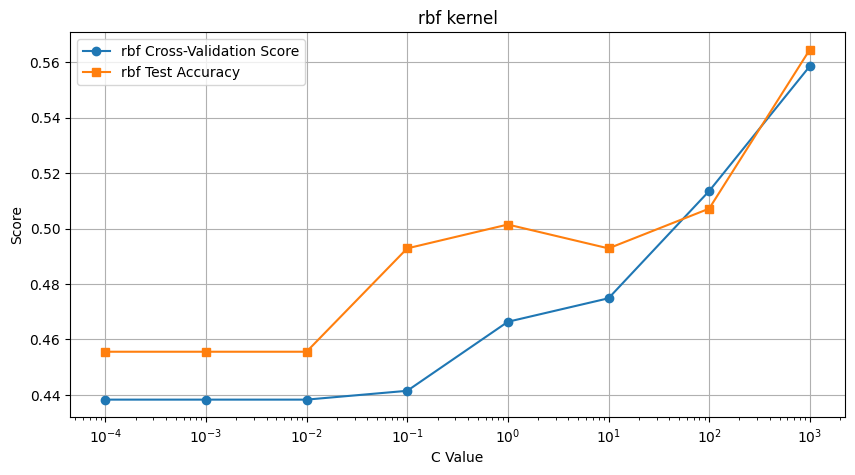

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
def plot(kernel):
    cv_scores = []
    test_accuracies = []

    for C in C_values:
        svc = SVC(C=C, kernel=kernel)
        cv_score = np.mean(cross_val_score(svc, X_train, Y_train, cv=2))
        cv_scores.append(cv_score)

        svc.fit(X_train, Y_train)
        test_accuracy = svc.score(X_test, Y_test)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(10, 5))
    plt.plot(C_values, cv_scores, label=f'{kernel} Cross-Validation Score', marker='o')
    plt.plot(C_values, test_accuracies, label=f'{kernel} Test Accuracy', marker='s')
    plt.xscale('log')
    plt.xlabel('C Value')
    plt.ylabel('Score')
    plt.title(f'{kernel} kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

plot(kernel='rbf')
plot(kernel='linear')
plot(kernel='poly')


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 3, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 3, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_val, Y_val, normalize='true', ax=ax)
    pred = model.predict(X_val)
    conf.ax_.set_title('Validation Set Performance: ' + str(sum(pred == Y_val)/len(Y_val)));
    ax = fig.add_subplot(1, 3, 3)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Test Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

### Regular Dataset with Standard and Random

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
C_values = np.arange(1, 100, 1)
gamma_values = np.arange(0.01, 0.0001, -0.0001)

param_grid = [
    {
    'kernel': ['linear'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }]

svm = SVC(probability=True)
svm_grid_search = GridSearchCV(svm, param_grid, cv=2)
svm_grid_search.fit(X_train, Y_train)
svm_best_parameters = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_
svm_best_model = svm_grid_search.best_estimator_

 
print(f"Best Parameters: {svm_best_parameters}")
print(f"Best Score: {svm_best_score}")

In [ ]:
svm_grid_search.fit(X_train_random, y_train_random)
svm_best_parameters = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_
svm_best_model_random = svm_grid_search.best_estimator_

 
print(f"Best Parameters: {svm_best_parameters}")
print(f"Best Score: {svm_best_score}")

In [ ]:
from sklearn.metrics import classification_report
print("SVM Regular Dataset")
print(classification_report(Y_test, svm_best_model.predict(X_test)))
eval_model(svm_best_model, X_train, Y_train, X_validation, Y_validation, X_test, Y_test)

SVM Train
              precision    recall  f1-score   support

          -1       0.91      0.83      0.87       109
           0       0.74      0.81      0.78        81
           1       0.88      0.89      0.89       159

    accuracy                           0.85       349
   macro avg       0.84      0.84      0.84       349
weighted avg       0.86      0.85      0.85       349



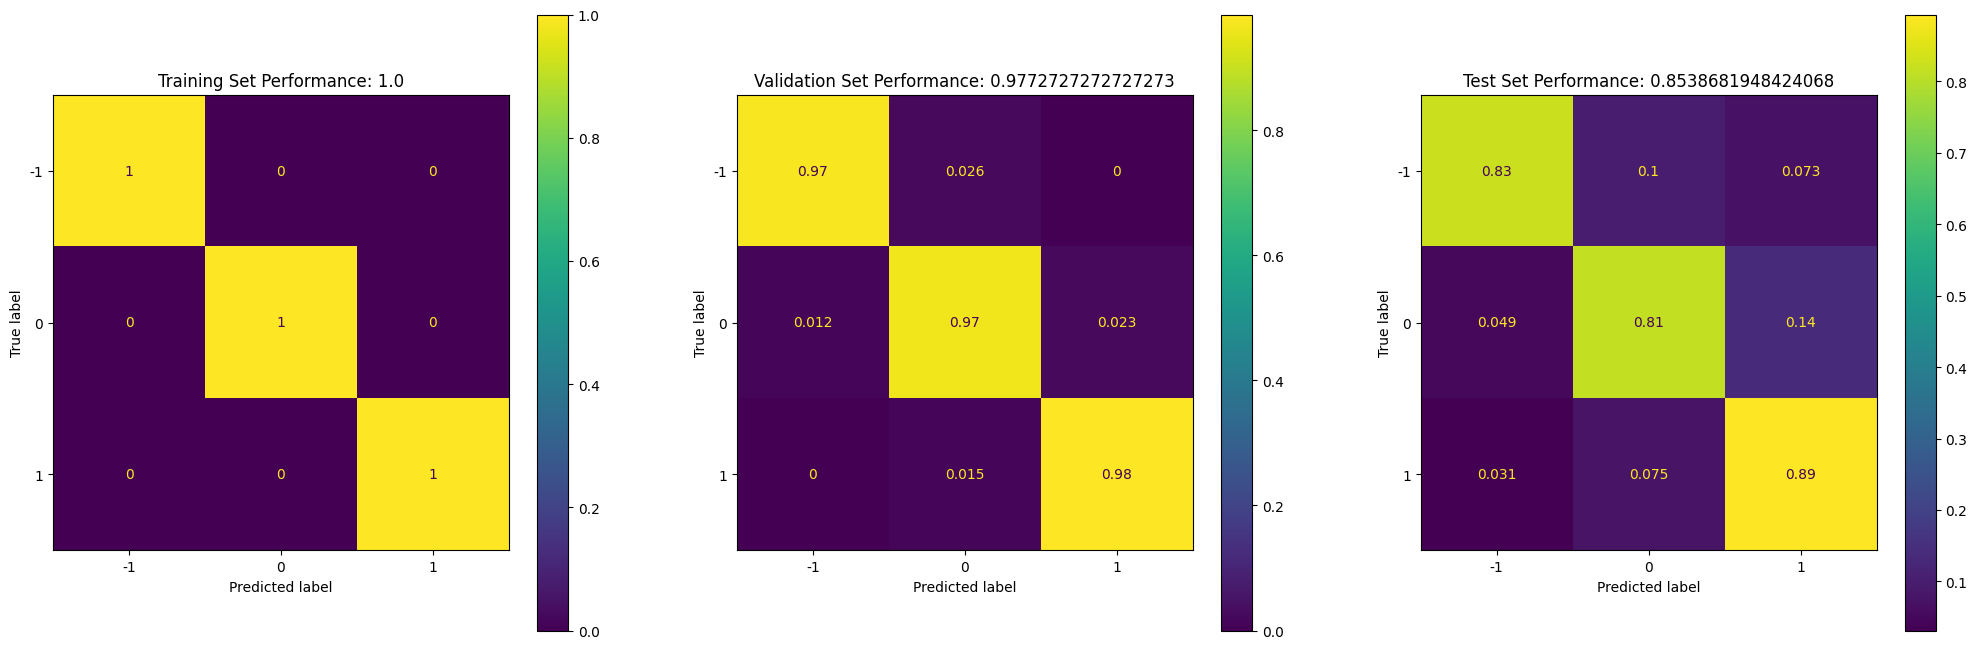

In [90]:
from sklearn.metrics import classification_report
print("SVM Regular Dataset (Random)")
print(classification_report(y_test_random, svm_best_model.predict(X_test_random)))
eval_model(svm_best_model, X_train_random, y_train_random, X_validation_random, y_validation_random, X_test_random, y_test_random)